In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [250]:
Boston=pd.read_csv(r"C:\Users\psair\Downloads\boston\BostonHousing.csv")
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0



    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's


In [251]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >]],
      dtype=object)

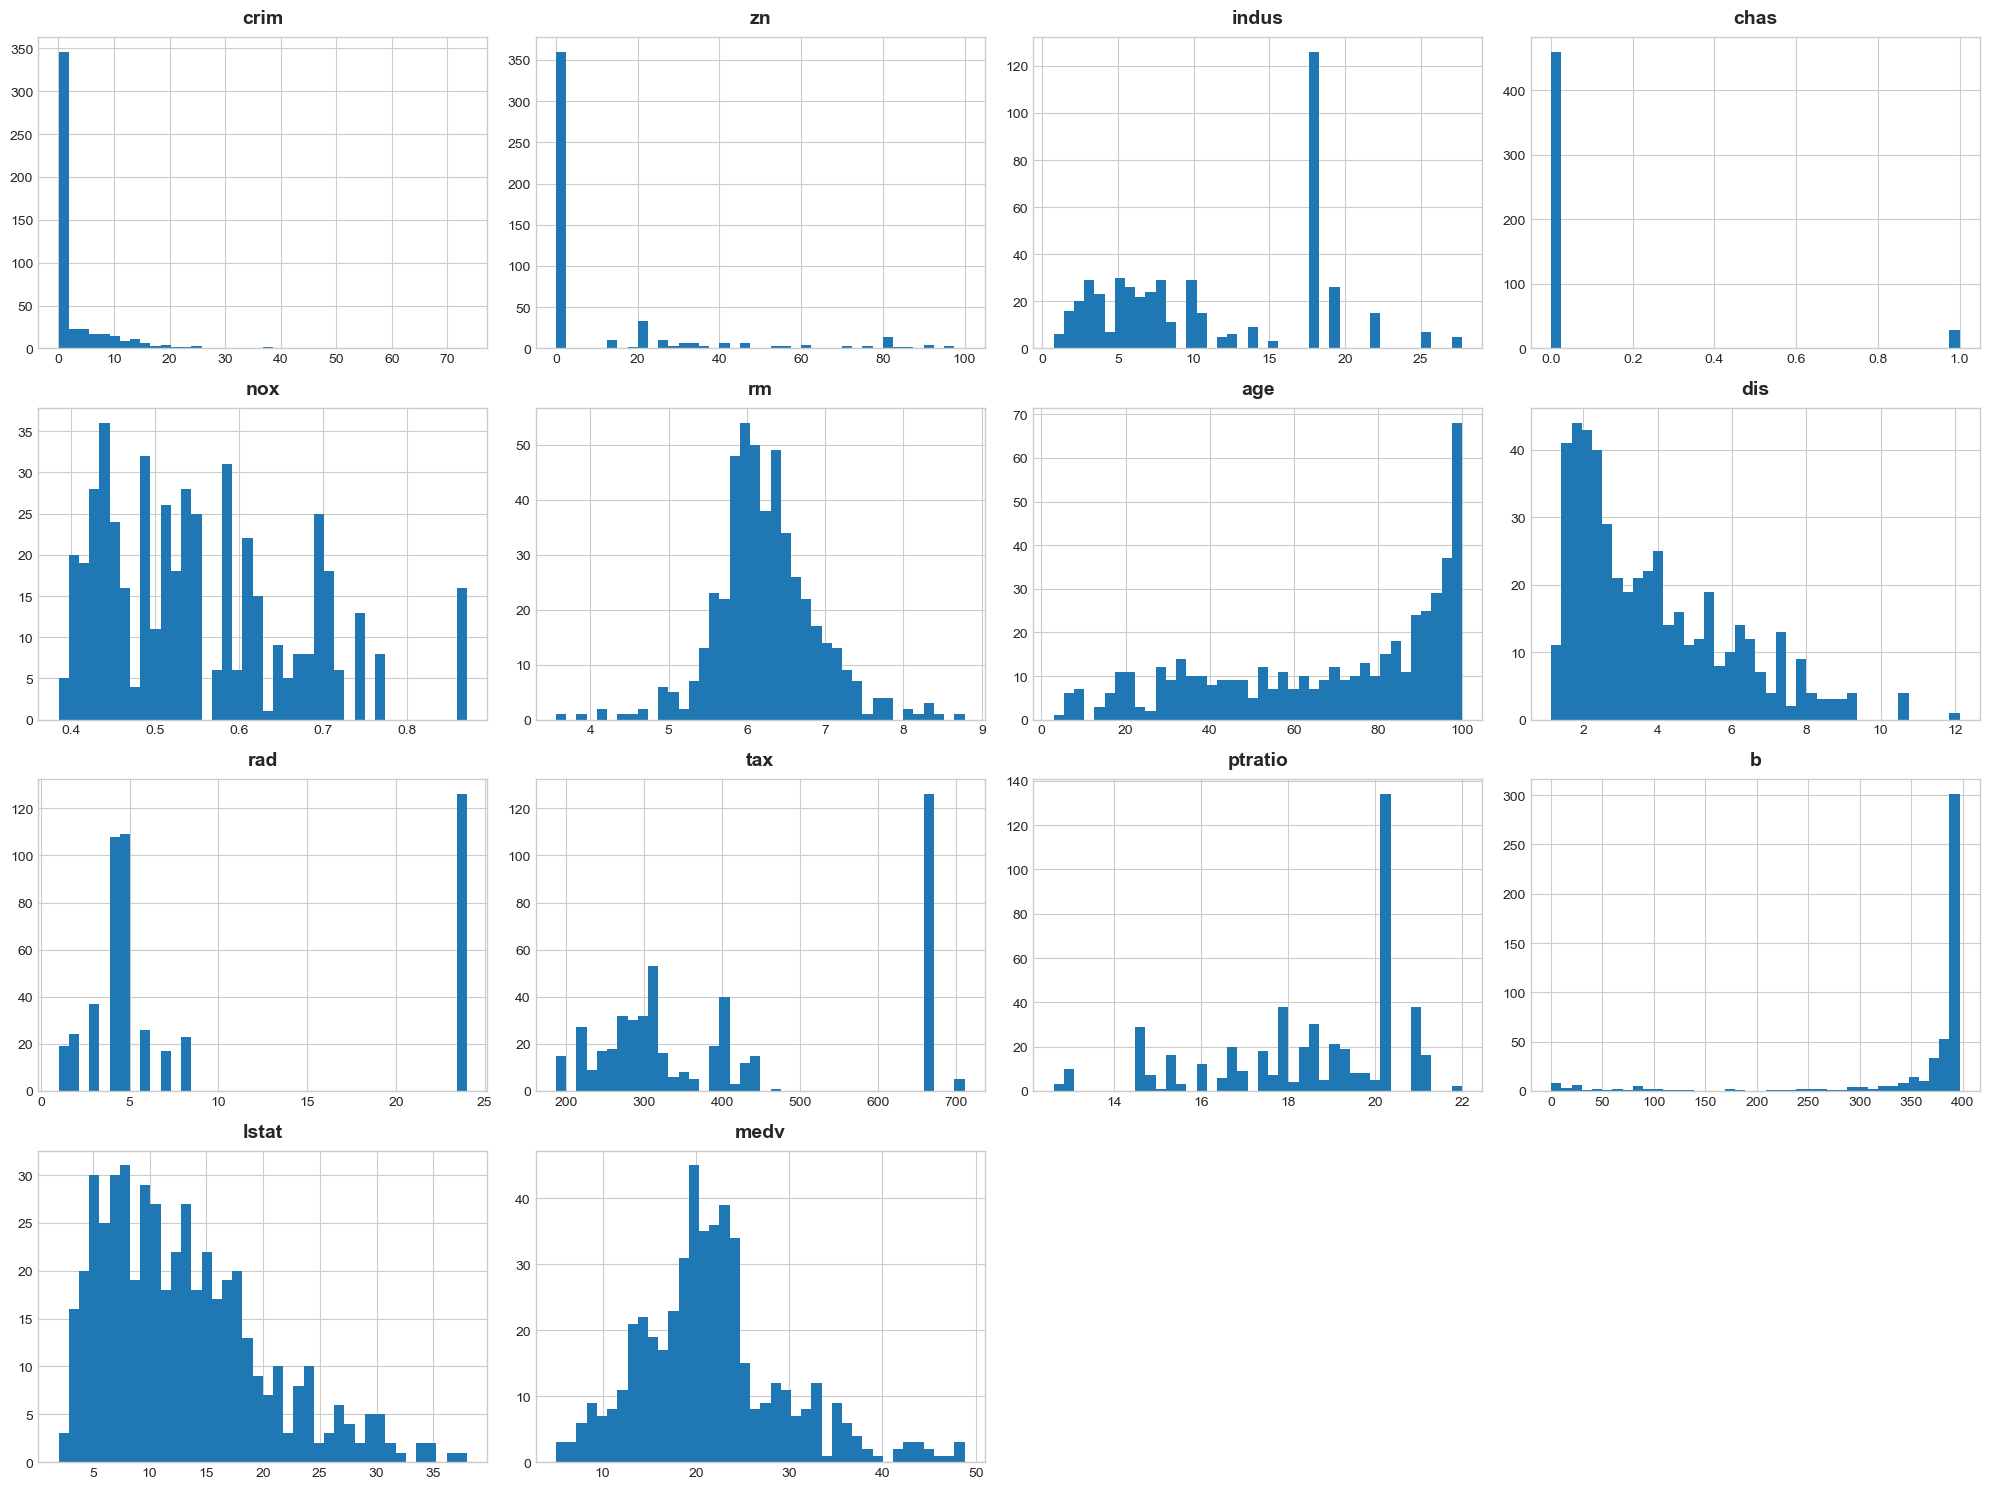

In [435]:
Boston.hist(bins=40,figsize=(20,15))

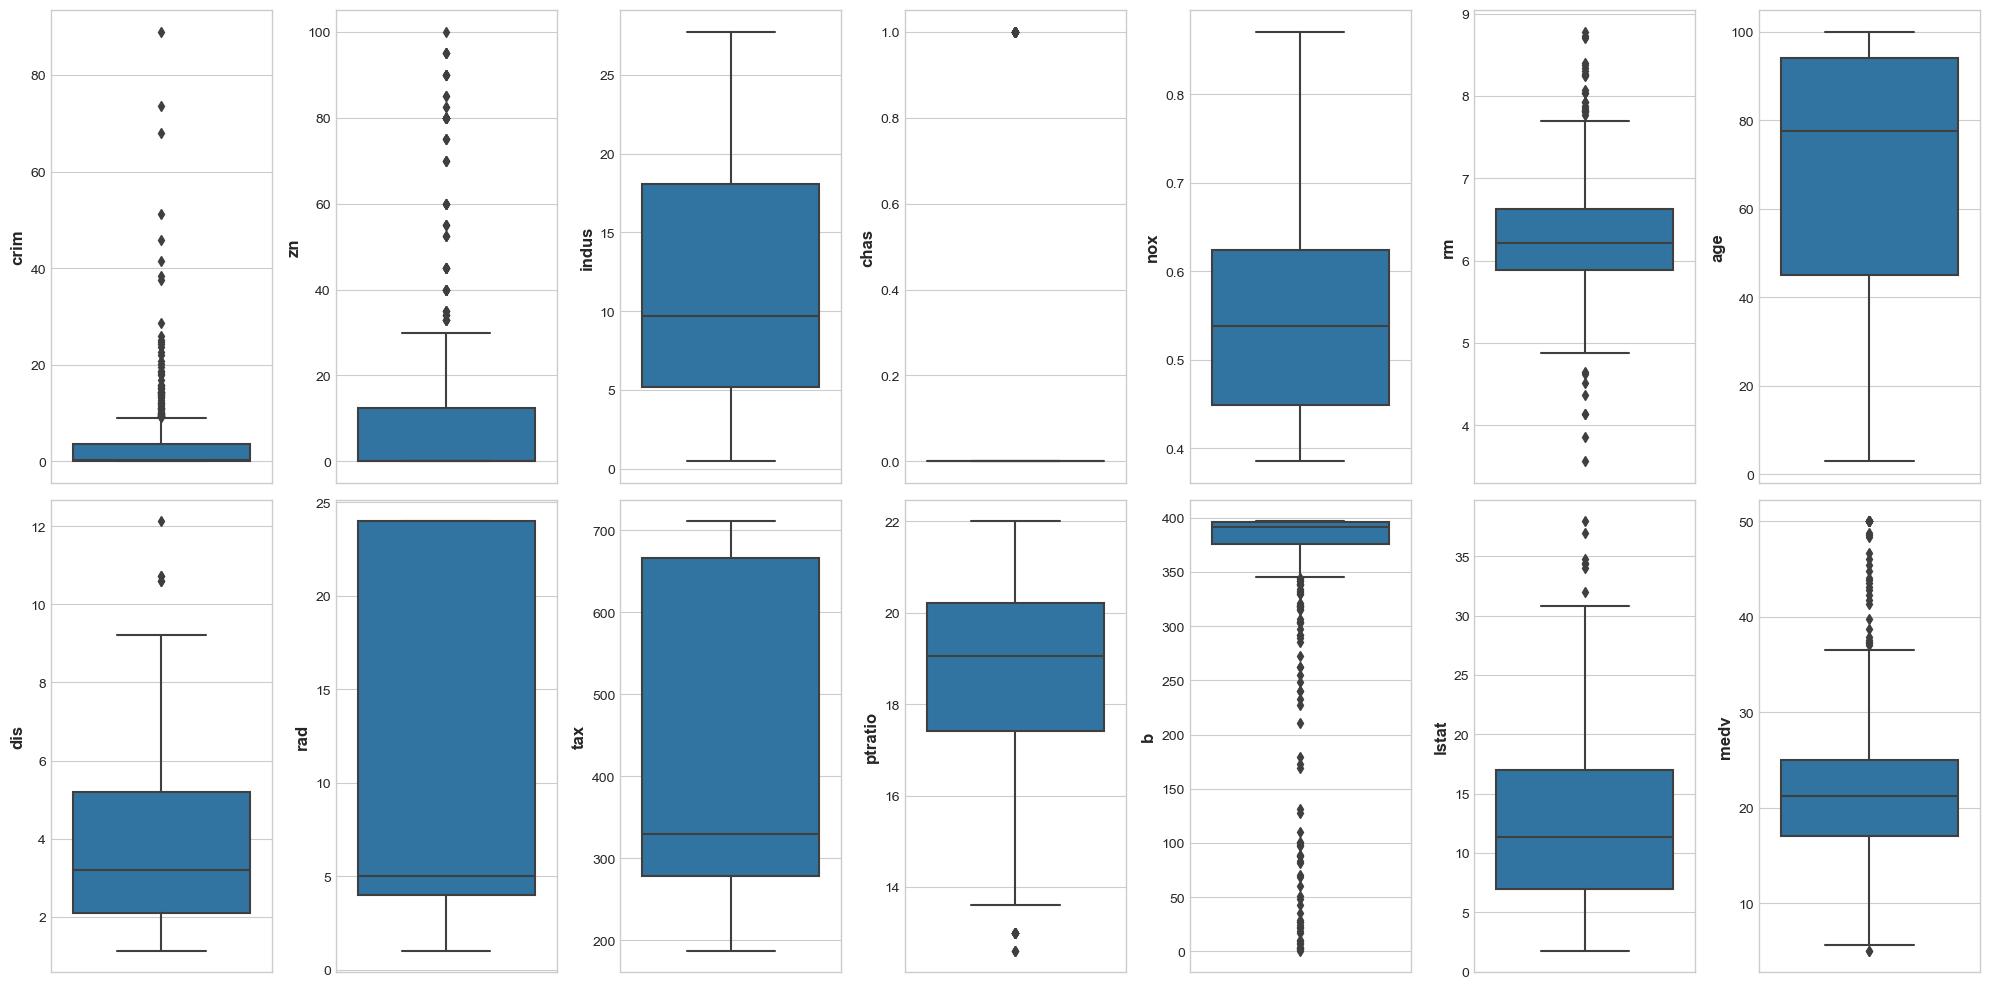

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in Boston.items():
    sns.boxplot(y=k, data=Boston, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

form above fig Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [253]:
for k, v in Boston.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(Boston
                                                    )[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column crim outliers = 13.04%
Column zn outliers = 13.44%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 5.93%
Column age outliers = 0.00%
Column dis outliers = 0.99%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 2.96%
Column b outliers = 15.22%
Column lstat outliers = 1.38%
Column medv outliers = 7.91%


Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions

In [320]:
Boston= Boston[~(Boston['medv'] >= 50.0)]
print(np.shape(Boston))

(490, 14)


In [321]:
Boston= Boston[~(Boston['crim'] >= 80.0)]
print(np.shape(Boston))

(489, 14)


In [380]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     489 non-null    float64
 1   zn       489 non-null    float64
 2   indus    489 non-null    float64
 3   chas     489 non-null    int64  
 4   nox      489 non-null    float64
 5   rm       484 non-null    float64
 6   age      489 non-null    float64
 7   dis      489 non-null    float64
 8   rad      489 non-null    int64  
 9   tax      489 non-null    int64  
 10  ptratio  489 non-null    float64
 11  b        489 non-null    float64
 12  lstat    489 non-null    float64
 13  medv     489 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 57.3 KB


Let's see how these features plus MEDV distributions looks like

C:\Users\psair\AppData\Local\Temp\ipykernel_29272\2339163897.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\psair\AppData\Local\Temp\ipykernel_29272\2339163897.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\psair\AppData\Local\Temp\ipykernel_29272\2339163897.py:5: UserWarning:



`distplot` is

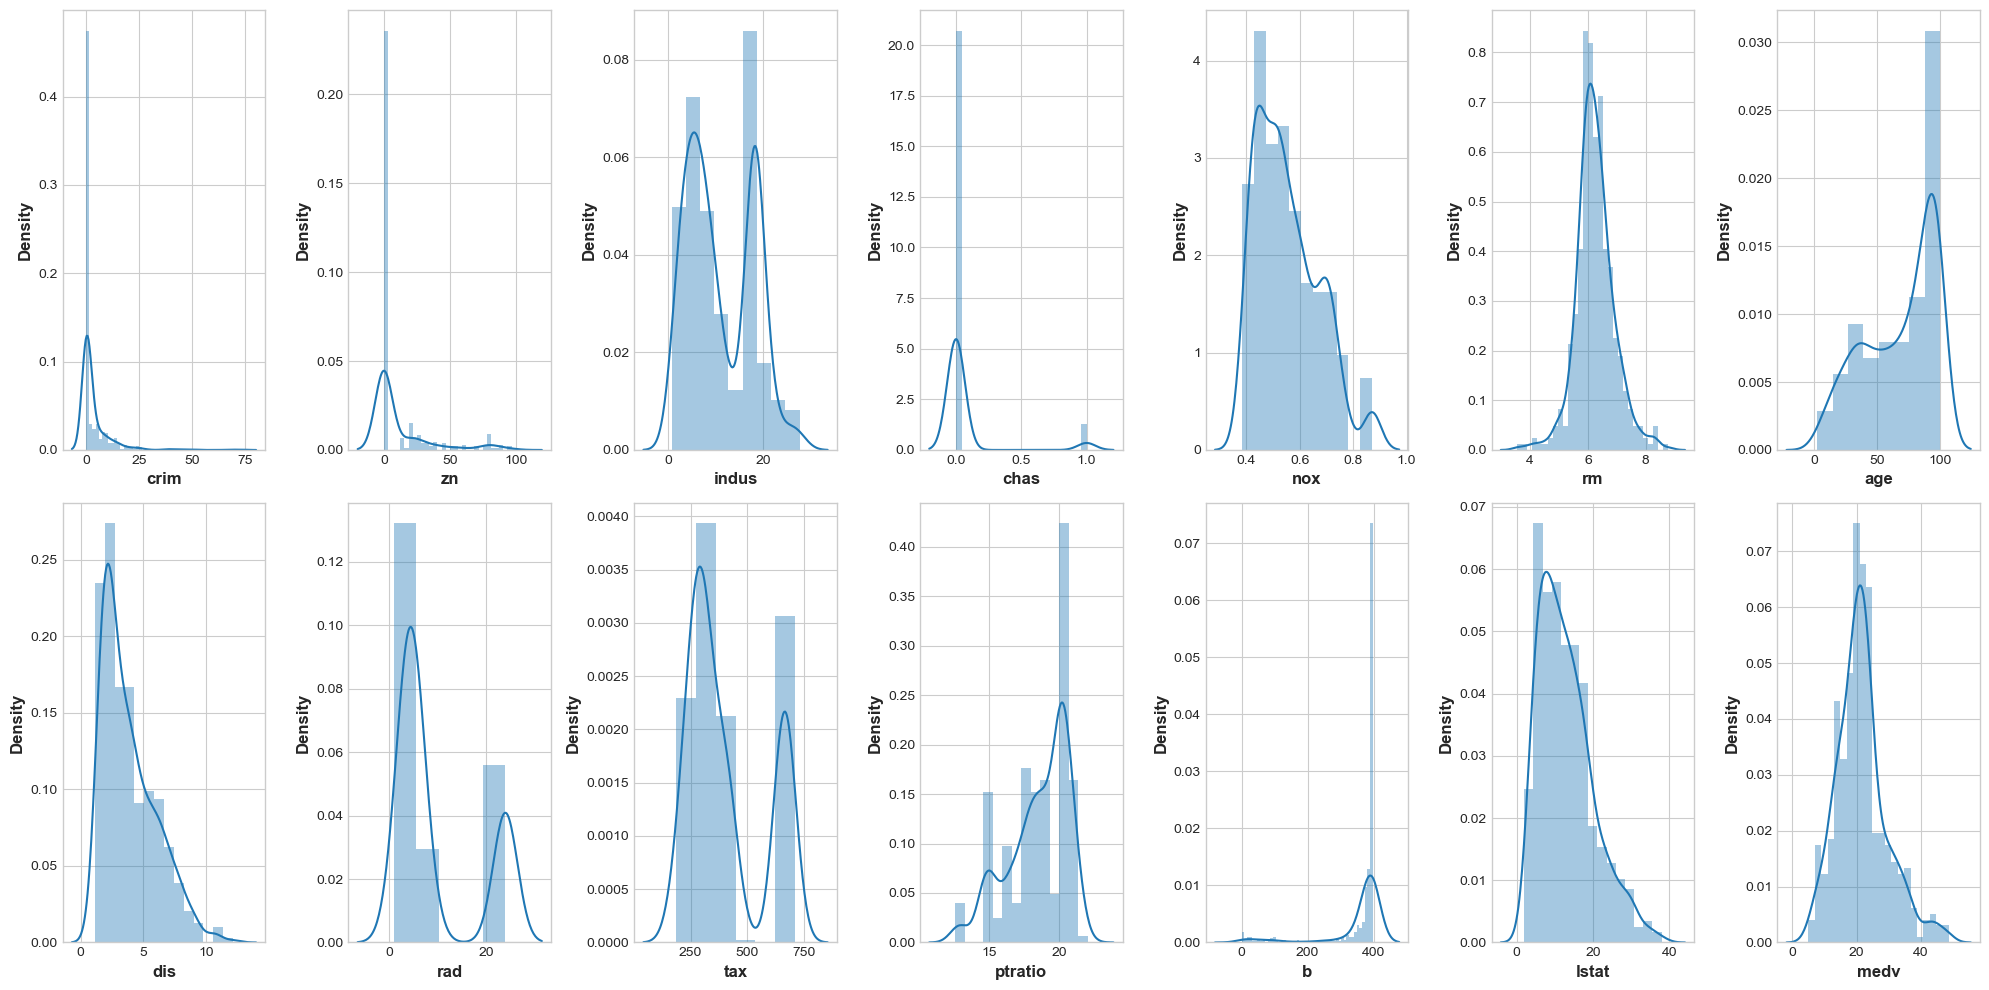

In [323]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in Boston.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [325]:
Boston1=Boston.dropna()

In [326]:
Boston1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     484 non-null    float64
 1   zn       484 non-null    float64
 2   indus    484 non-null    float64
 3   chas     484 non-null    int64  
 4   nox      484 non-null    float64
 5   rm       484 non-null    float64
 6   age      484 non-null    float64
 7   dis      484 non-null    float64
 8   rad      484 non-null    int64  
 9   tax      484 non-null    int64  
 10  ptratio  484 non-null    float64
 11  b        484 non-null    float64
 12  lstat    484 non-null    float64
 13  medv     484 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.7 KB


In [327]:
Boston1.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [329]:
Boston1.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.212296,0.433822,-0.067178,0.446739,-0.269732,0.378363,-0.402310,0.663886,0.617711,0.304489,-0.437799,0.503448,-0.473144
zn,-0.212296,1.000000,-0.529615,-0.054669,-0.513262,0.311251,-0.563019,0.674289,-0.309645,-0.303561,-0.382734,0.177669,-0.422697,0.403821
indus,0.433822,-0.529615,1.000000,0.035701,0.763973,-0.418340,0.638774,-0.711417,0.597692,0.716989,0.385897,-0.365734,0.638129,-0.602296
chas,-0.067178,-0.054669,0.035701,1.000000,0.085451,0.045944,0.072511,-0.077903,-0.033496,-0.068686,-0.116913,0.043078,-0.005946,0.073693
nox,0.446739,-0.513262,0.763973,0.085451,1.000000,-0.326041,0.728712,-0.769545,0.611645,0.665437,0.186825,-0.384061,0.612857,-0.524591
rm,-0.269732,0.311251,-0.418340,0.045944,-0.326041,1.000000,-0.271178,0.247078,-0.200958,-0.286938,-0.297710,0.118135,-0.614880,0.693169
age,0.378363,-0.563019,0.638774,0.072511,0.728712,-0.271178,1.000000,-0.746253,0.454924,0.500582,0.270736,-0.282014,0.636502,-0.490484
dis,-0.402310,0.674289,-0.711417,-0.077903,-0.769545,0.247078,-0.746253,1.000000,-0.493560,-0.530788,-0.244271,0.301398,-0.540396,0.368895
rad,0.663886,-0.309645,0.597692,-0.033496,0.611645,-0.200958,0.454924,-0.493560,1.000000,0.909248,0.457951,-0.453345,0.512521,-0.476980
tax,0.617711,-0.303561,0.716989,-0.068686,0.665437,-0.286938,0.500582,-0.530788,0.909248,1.000000,0.452887,-0.449858,0.567761,-0.573298


C:\Users\psair\AppData\Local\Temp\ipykernel_29272\3342871501.py:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



Text(0.5, 1.0, 'Absolute Pearson Correlation between Different Features')

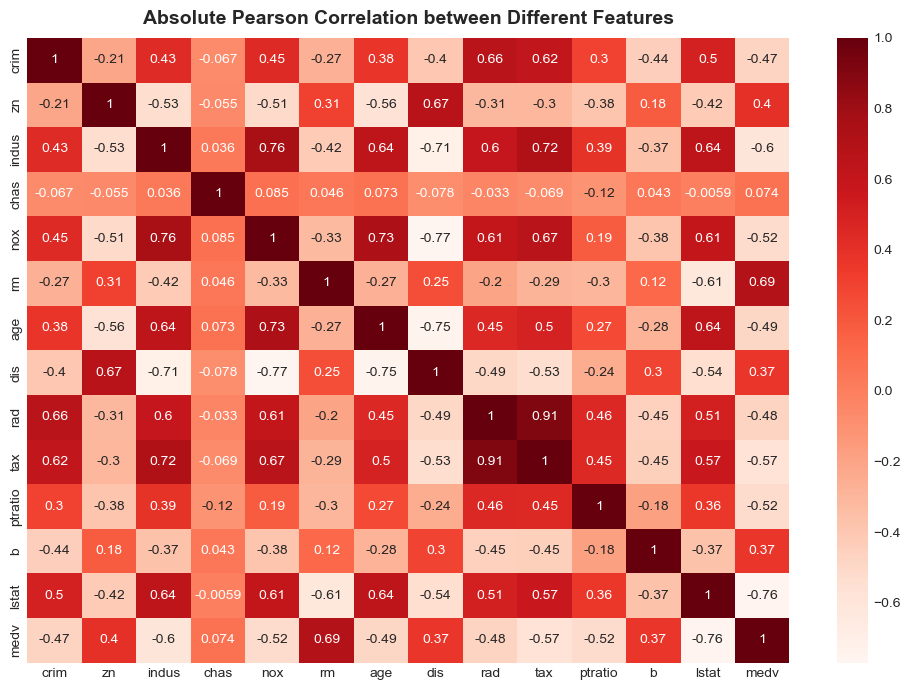

In [330]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plt.figure(figsize = (10,7))
sns.heatmap(Boston1.corr(), annot=True, cmap="Reds")
plt.title('Absolute Pearson Correlation between Different Features')


From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

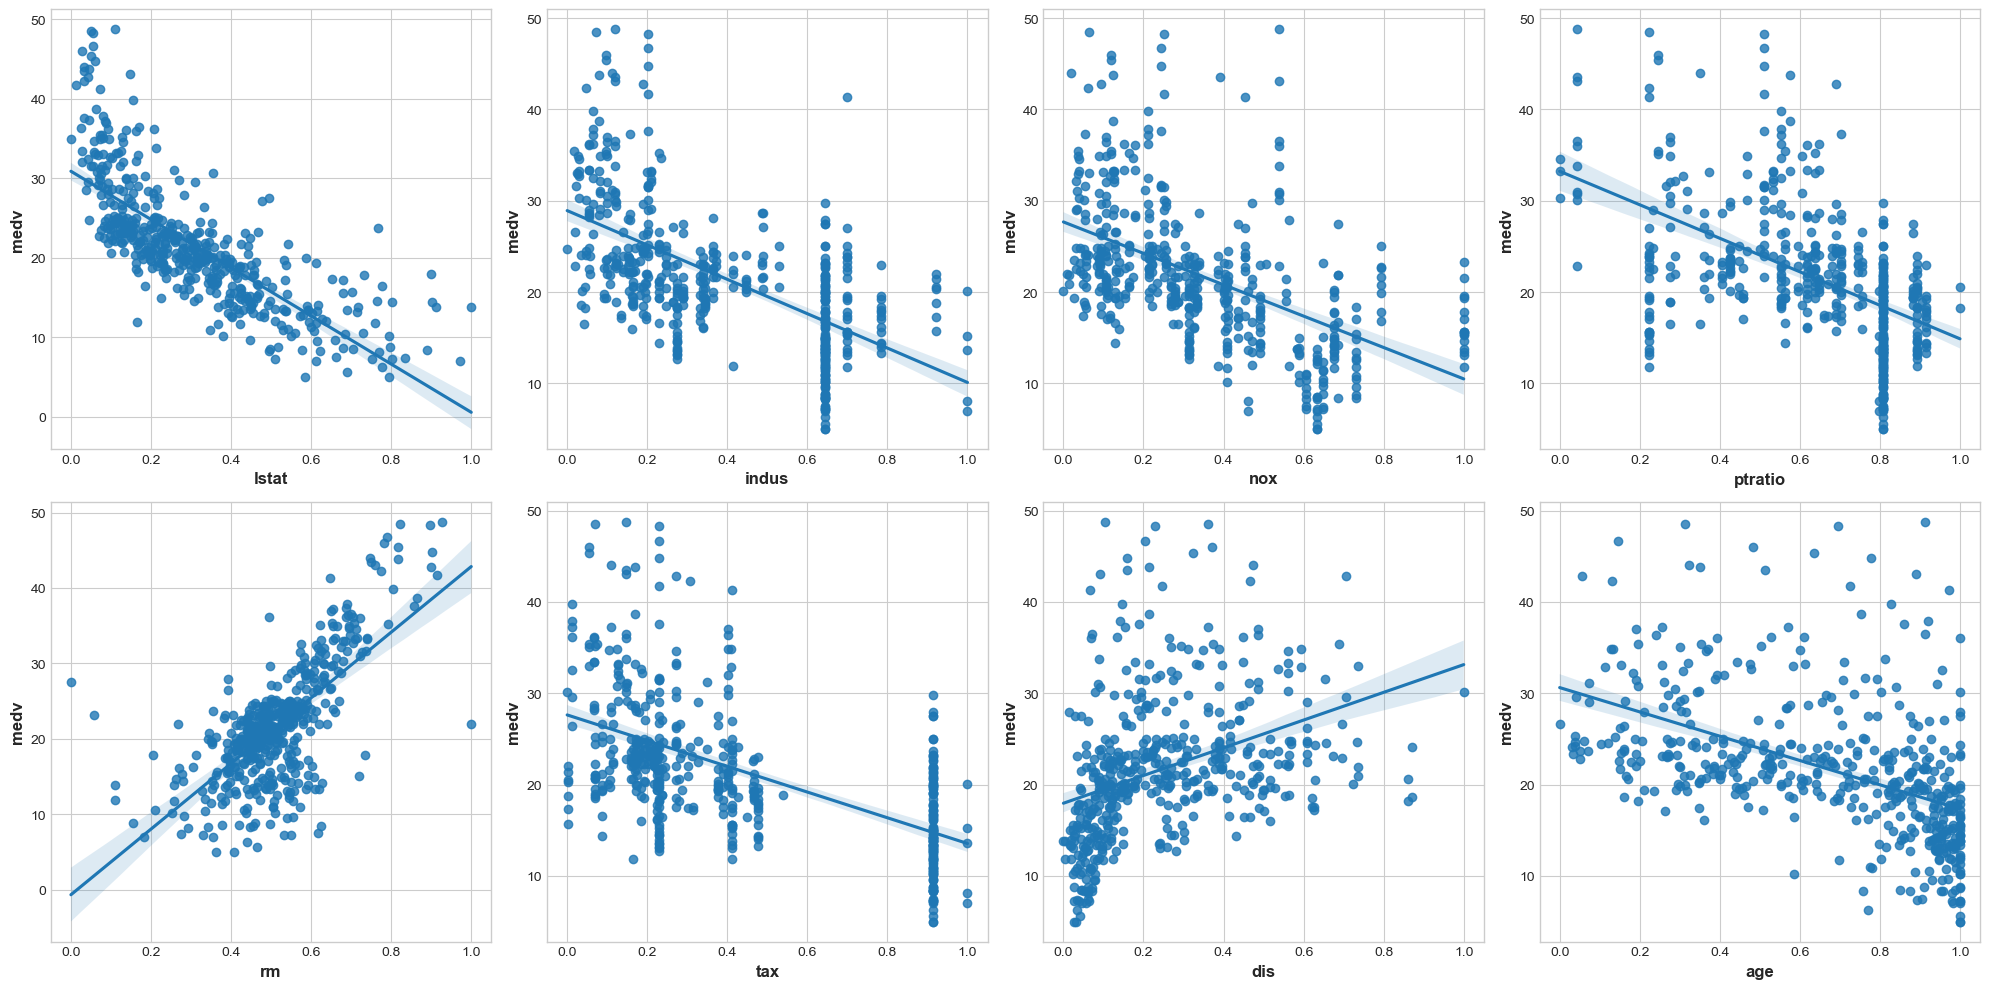

In [387]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['lstat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age',]
x = Boston1.loc[:,column_sels]
y = Boston1['medv']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

So with these analsis, we may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features.

In [388]:
X = Boston1.loc[:, Boston1.columns != 'medv']
y = Boston1.loc[:, Boston1.columns == 'medv']
  

In [389]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [390]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [391]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [392]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression() #instantiate 

In [393]:
lm.fit(X_train,y_train)

LinearRegression()

In [394]:
print(lm.intercept_)

[30.79627611]


In [395]:
print(lm.coef_)
type(lm.coef_)

[[-1.01330070e-01  3.61218958e-02 -1.55163945e-02  2.69954415e-01
  -1.02665646e+01  3.65749997e+00 -2.84438467e-02 -1.13020413e+00
   2.69654483e-01 -1.42479011e-02 -7.73948167e-01  7.16600208e-03
  -3.64258453e-01]]


numpy.ndarray

Predictions

In [396]:
predicts = lm.predict(X_test)

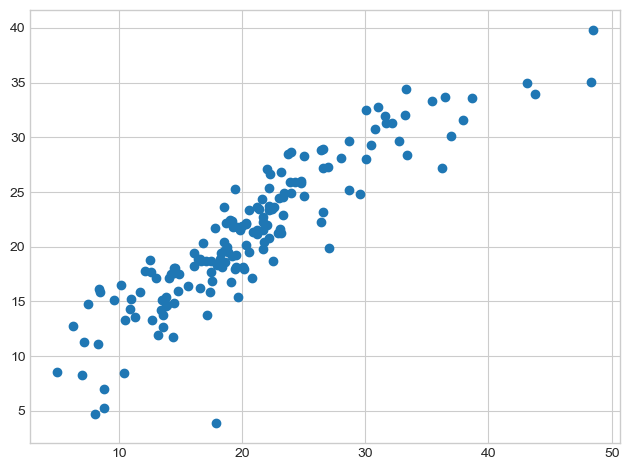

In [397]:
plt.scatter(x=y_test,y=predicts)

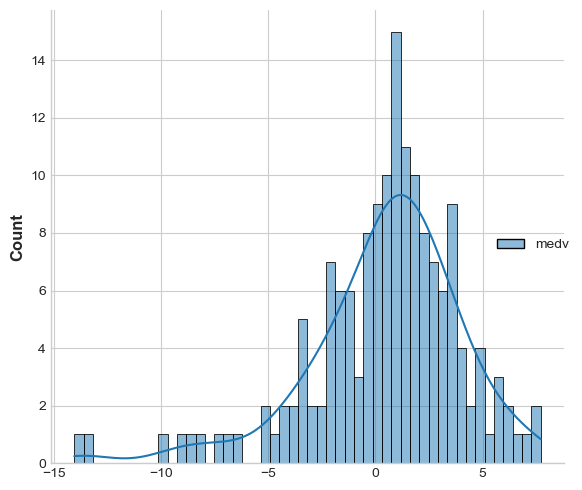

In [398]:
sns.displot((predicts-y_test),bins=50,kde=True)

In [399]:
from sklearn import metrics

In [400]:
#MAE
print("MAE:",metrics.mean_absolute_error(y_test,predicts))

MAE: 2.6777744285370533


In [401]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predicts)))

RMSE: 3.5890040390513684


In [402]:
print("MSE:",metrics.mean_squared_error(y_test,predicts))

MSE: 12.880949992327038


In [403]:
#predcited price
print(predicts)

[[13.32589815]
 [15.41897121]
 [29.32110465]
 [16.73751953]
 [24.35347216]
 [17.93173536]
 [17.80017509]
 [13.73861067]
 [23.48286915]
 [27.07251199]
 [19.49016867]
 [22.29745405]
 [20.38210267]
 [22.402212  ]
 [28.0338238 ]
 [17.13240013]
 [25.37506289]
 [18.05595848]
 [25.78526293]
 [28.28309785]
 [34.96767754]
 [18.71055892]
 [20.11593639]
 [21.53608713]
 [15.09567717]
 [25.92415074]
 [19.42219957]
 [12.66941573]
 [28.08063117]
 [24.88715656]
 [21.88923829]
 [20.43328756]
 [18.91771865]
 [25.92356995]
 [28.69861175]
 [22.23456737]
 [21.54335474]
 [22.09684748]
 [13.61181259]
 [ 3.84207005]
 [15.86711591]
 [24.89738893]
 [31.92668937]
 [19.50780322]
 [18.89616451]
 [25.28290111]
 [22.67670987]
 [18.36277802]
 [18.09506098]
 [28.92409448]
 [18.24082907]
 [18.68531387]
 [34.39030588]
 [33.68261689]
 [ 8.58536448]
 [21.74761213]
 [21.55834817]
 [32.01044023]
 [18.10567718]
 [19.77945965]
 [23.6719214 ]
 [19.63558933]
 [30.12328376]
 [31.3043375 ]
 [29.63318807]
 [33.55739362]
 [14.21123

In [404]:
#actual prize 
y_test

,medv
440,10.5
496,19.7
191,30.5
468,19.1
313,21.6
...,...
27,14.8
7,27.1
462,19.5
112,18.8


In [405]:
#No. of elements
predicts.size

160

In [406]:
##No. of elements
y_test.count()

medv    160
dtype: int64

In [407]:
#first house actual price 
y_test.iloc[0]

medv    10.5
Name: 440, dtype: float64

In [408]:
#first house's predicted price 
predicts[0]

array([13.32589815])

2nd model

In [409]:
from sklearn.model_selection import train_test_split

X = Boston1.loc[:, Boston1.columns != 'medv']
y = Boston1.loc[:, Boston1.columns == 'medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [410]:
from sklearn.preprocessing import MinMaxScaler

In [411]:
scaler = MinMaxScaler()

In [412]:
scaler.fit(X_train) # fit with only train data not with test data to prevent data leakage

MinMaxScaler()

In [413]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [414]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [415]:
model = Sequential()

In [416]:
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
# default learning_rate=1e-3

In [417]:
import tensorflow as tf
learning_rate = tf.Variable(0.0001, trainable=False) # initialize learning_rate
tf.keras.backend.set_value(learning_rate,0.00001)

In [418]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,
         epochs=300)

Epoch 1/300
6/6 [==============================] - 1s 23ms/step - loss: 532.1926 - val_loss: 539.6808
Epoch 2/300
6/6 [==============================] - 0s 9ms/step - loss: 527.7287 - val_loss: 535.1553
Epoch 3/300
6/6 [==============================] - 0s 11ms/step - loss: 523.1340 - val_loss: 530.1227
Epoch 4/300
6/6 [==============================] - 0s 7ms/step - loss: 517.7584 - val_loss: 523.7618
Epoch 5/300
6/6 [==============================] - 0s 10ms/step - loss: 511.0546 - val_loss: 515.8574
Epoch 6/300
6/6 [==============================] - 0s 10ms/step - loss: 502.7610 - val_loss: 505.9339
Epoch 7/300
6/6 [==============================] - 0s 7ms/step - loss: 492.2394 - val_loss: 493.1976
Epoch 8/300
6/6 [==============================] - 0s 7ms/step - loss: 478.5986 - val_loss: 476.6669
Epoch 9/300
6/6 [==============================] - 0s 7ms/step - loss: 460.9416 - val_loss: 455.2595
Epoch 10/300
6/6 [==============================] - 0s 7ms/step - loss: 437.9807 - val_

6/6 [==============================] - 0s 18ms/step - loss: 19.7243 - val_loss: 18.3811
Epoch 83/300
6/6 [==============================] - 0s 12ms/step - loss: 19.1335 - val_loss: 18.2652
Epoch 84/300
6/6 [==============================] - 0s 15ms/step - loss: 18.8625 - val_loss: 18.1262
Epoch 85/300
6/6 [==============================] - 0s 14ms/step - loss: 18.6148 - val_loss: 17.5481
Epoch 86/300
6/6 [==============================] - 0s 19ms/step - loss: 18.1467 - val_loss: 17.6565
Epoch 87/300
6/6 [==============================] - 0s 22ms/step - loss: 17.9252 - val_loss: 17.1853
Epoch 88/300
6/6 [==============================] - 0s 22ms/step - loss: 17.6827 - val_loss: 16.7362
Epoch 89/300
6/6 [==============================] - 0s 19ms/step - loss: 17.2611 - val_loss: 16.5410
Epoch 90/300
6/6 [==============================] - 0s 16ms/step - loss: 16.9242 - val_loss: 16.3914
Epoch 91/300
6/6 [==============================] - 0s 11ms/step - loss: 16.6665 - val_loss: 16.0640
Epo

Epoch 243/300
6/6 [==============================] - 0s 15ms/step - loss: 9.5569 - val_loss: 10.0939
Epoch 244/300
6/6 [==============================] - 0s 11ms/step - loss: 9.6202 - val_loss: 9.6933
Epoch 245/300
6/6 [==============================] - 0s 8ms/step - loss: 9.7123 - val_loss: 9.6288
Epoch 246/300
6/6 [==============================] - 0s 13ms/step - loss: 9.5758 - val_loss: 9.7900
Epoch 247/300
6/6 [==============================] - 0s 14ms/step - loss: 9.8231 - val_loss: 9.9372
Epoch 248/300
6/6 [==============================] - 0s 14ms/step - loss: 9.6570 - val_loss: 9.6248
Epoch 249/300
6/6 [==============================] - 0s 13ms/step - loss: 9.5402 - val_loss: 9.9187
Epoch 250/300
6/6 [==============================] - 0s 17ms/step - loss: 9.5164 - val_loss: 9.6814
Epoch 251/300
6/6 [==============================] - 0s 17ms/step - loss: 9.4725 - val_loss: 9.6639
Epoch 252/300
6/6 [==============================] - 0s 14ms/step - loss: 9.5118 - val_loss: 9.7489


In [419]:
df_loss = pd.DataFrame(model.history.history)
df_loss.head()

,loss,val_loss
0,532.192627,539.680847
1,527.728699,535.155334
2,523.133972,530.122742
3,517.758423,523.761841
4,511.054626,515.857422


<Axes: >

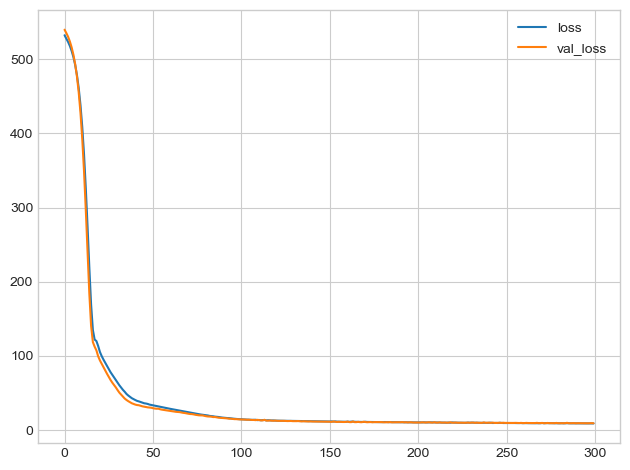

In [420]:


df_loss.plot()



In [421]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

In [422]:
predict = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [423]:
predict.shape

(146, 1)

In [424]:
y_test.shape

(146, 1)

In [425]:
 print(mean_absolute_error(y_test,predict))

2.2025214985625383


In [426]:
print(mean_squared_error(y_test,predict))

9.181597162002259


In [427]:
print(np.sqrt(mean_squared_error(y_test,predict)))

3.0301150410507947


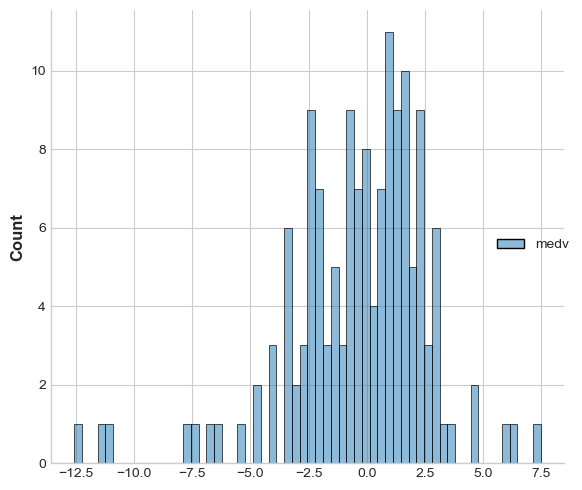

In [428]:
sns.displot(predict-y_test,bins=60)

In [429]:
# regression score function.
# Best possible score is 1.0 

r2_score(y_test,predict)

0.8450187379950231

In [430]:
#The Explained Variance score is similar to the r2_score
explained_variance_score(y_test,predict)

0.8468380325845252

In [431]:
#np.random.seed(101)
rand_house_id = np.random.randint(0,len(Boston1))
rand_house_id

470

In [432]:
rand_house = Boston1.iloc[rand_house_id]
rand_house.head()

crim      0.11132
zn        0.00000
indus    27.74000
chas      0.00000
nox       0.60900
Name: 492, dtype: float64

In [433]:
model.predict(scaler.transform([rand_house.drop('medv')]))

1/1 [==============================] - 0s 14ms/step


C:\Users\psair\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



array([[17.18369]], dtype=float32)

In [434]:
rand_house['medv']

20.1